# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `2` | `Questions`

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### <font color = "blue"> `IMPORT` your dataset: `bank_loan.csv`. </font>

In [2]:
loans = pd.read_csv('Data/bank_loan.csv')

### Question 1. Data `Inspection`

#### Question 1.1. How would you look at the first few rows of the DF?

In [3]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Question 1.2. How would you look at all the column names?

In [4]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Question 2. Data `Wrangling`

#### Question 2.1. How would you check the number of missing values in each column?

In [5]:
loans.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

> There are columns have a large number of missing values 

> Let's clean them first.

#### Question 2.2. How would you find the percentage of missing values in each column? 
> Hint: Use the missing values and divide it by something.

In [6]:
loans.isna().sum() / len(loans)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

#### Question 2.3. How would you remove the columns having more than 90% missing values?

In [7]:
pct_missing = loans.isna().sum() / len(loans)
cols_to_drop = pct_missing[pct_missing > 0.9].index

loans = loans.drop(columns = cols_to_drop)

> Let's check the number of missing values again.

In [8]:
loans.isna().sum() / len(loans)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325805
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

#### Question 2.4. How would you remove columns having more than 30% of missing values?
> Hint: With so **few** columns with more than 30% missing values, can you `drop` them by **name**?

In [9]:
loans = loans.drop(columns = ['desc', 'mths_since_last_delinq'])

> Let's check number of missing values again, does all columns have **less than** 90% missing values?

In [10]:
pct_missing = loans.isna().sum() / len(loans)
any(pct_missing[pct_missing < 0.9])

True

#### Question 2.5. How would you check missing values rows-wise, by the way?
> Hint: What does the `axis` argument do?

In [11]:
loans.isna().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

> How would you check whether some rows have more than 5 missing values

In [12]:
row_missing = loans.isna().sum(axis = 1)
row_missing[row_missing > 5]

Series([], dtype: int64)

> The dataset is cleaned now; let's check whether all the columns are in the correct format or not.

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

> The column `int_rate` is character type, let's convert it to float.

#### Question 2.6. How would you use `lambda` to convert the data type of `int_rate`?

In [14]:
loans['int_rate'] = (
    loans
    ['int_rate']
    .apply(
        lambda x : float(x.replace('%',''))
    )
)

> Let's check the data types again.

In [15]:
loans['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


> Lets extract the numeric part from the variable employment length.

> First, let's drop the missing values from the column (otherwise the regex code below throws error) using regular expression to extract numeric values from the string convert to numeric

In [16]:
loans = loans.dropna(subset = 'emp_length')
loans['emp_length'] = (
    loans['emp_length']
    .dropna()
    .str
    .extract('(\d+)')
    .apply(
        pd.to_numeric
    )
)

> Let's take a look at type of the columns again

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

### Question 3. Exploratory Data Analysis (EDA)

> There are some variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [18]:
variables_to_remove = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

variables_to_remove

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

#### Question 3.1. How would you remove the set of variables from `variables_to_remove` from the dataset?

In [19]:
loans = loans.drop(columns = variables_to_remove)

#### Question 3.2. Are there any other variables that we can remove from the dataset also?

-  Also, we won't use the variables zip code, address, state etc. 
-  The variable `title` is derived from the variable `purpose` thus let get rid of all these variables as well

In [20]:
loans = loans.drop(columns = ['title', 'zip_code', 'addr_state'])

#### Question 3.3. Let's have a look at the target variable--`loan_status`. 

> Objecive: Re-label the values to a `binary form`: namely, `0` or `1`, 
>
> - 1 indicating that the person has defaulted and 
> - 0 otherwise.

But first, what makes up the target variable--`loan_status`?

In [21]:
loans['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

> You should be able to see that `fully paid` comprises most of the loans. 

> The ones marked `current` are neither fully paid not defaulted, so let's get rid of the current loans. 

> Hence, we will have two categories to label as 0 or 1.

- Filter for `Fully Paid` and `Charged Off` 
- Using `lambda`, let's label `Fully Paid` and `Charged Off`

In [22]:
filtered_loans = (
    loans
    [
        loans['loan_status']
        .isin(['Fully Paid', 'Charged Off'])
    ]
)

filtered_loans['loan_status'] = (
    filtered_loans
    ['loan_status']
    .apply(
        lambda x : 1 if x == 'Fully Paid' else 0
    )
)

> Let's convert `loan_status` to **integer data type** (again, use `lambda`).

In [23]:
filtered_loans['loan_status'] = (
    filtered_loans
    ['loan_status']
    .apply(lambda x : int(x))
)

> Let's take a look at the data points under the `loan_status` category.

In [24]:
filtered_loans['loan_status']

0        1
1        0
2        1
3        1
5        1
        ..
39712    1
39713    1
39714    1
39715    1
39716    1
Name: loan_status, Length: 37544, dtype: int64

### Question 4. A Simple Univariate Analysis

> First, let's look at the overall default rate.

#### Question 4.1. How would you calculate default rate? Please use `numpy` module.

In [25]:
import numpy as np

In [26]:
loan_status_arr = filtered_loans['loan_status'].values
1 - loan_status_arr.sum() / loan_status_arr.size

0.14380460259961647

> The overall default rate is about `14%`.  

> Let's visualize default rates across grade of the loan.

In [27]:
default_rates_by_grade = (
    filtered_loans
    .groupby('grade')
    .agg(
        no_default = ('loan_status', 'sum'), 
        n = ('loan_status', 'count')
    )
)

default_rates_by_grade['default'] = default_rates_by_grade.eval('`n` - `no_default`')
default_rates_by_grade['default_rate'] = default_rates_by_grade.eval('`default` / `n`')

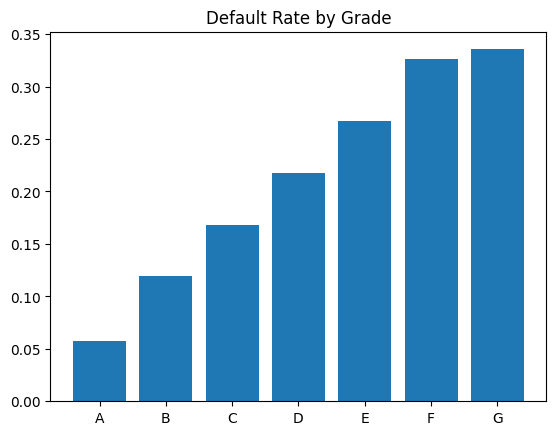

In [28]:
plt.bar(default_rates_by_grade.index, default_rates_by_grade['default_rate'])
plt.title('Default Rate by Grade');

#### Question 4.2. Create a function to plot `loan_status` across `any categorical variable`.
> Hint: How did you visualise in Question 4.1? Is there a way to generalise what you did for `any categorical variable`?

In [29]:
def plot_loan_status(loans, category):
    default_rates_by_category = (
        loans
        .groupby(category)
        .agg(
            no_default = ('loan_status', 'sum'), 
            n = ('loan_status', 'count')
        )
    )

    default_rates_by_category['default'] = default_rates_by_category.eval('`n` - `no_default`')
    default_rates_by_category['default_rate'] = default_rates_by_category.eval('`default` / `n`')

    plt.figure(figsize = (20,5))
    plt.bar(default_rates_by_category.index, default_rates_by_category['default_rate'])
    plt.title(f'Default Rate by {category}')
    plt.xticks(rotation = 45);

#### How's default rates across `grade` of loan? Use your newly created function :)

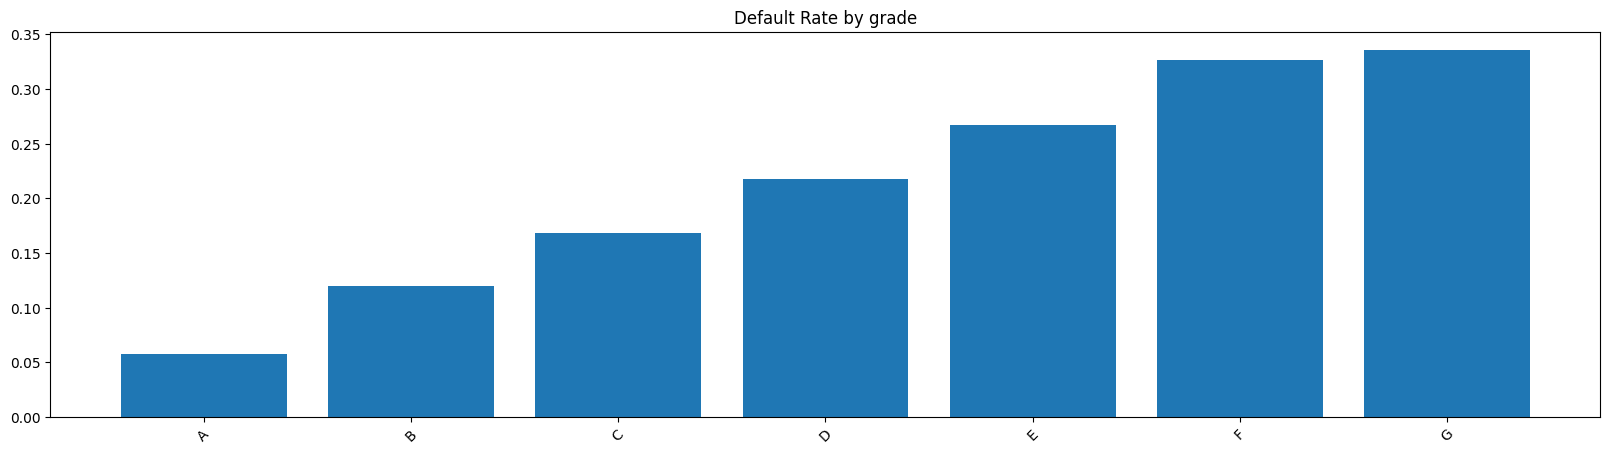

In [30]:
plot_loan_status(loans = filtered_loans, category = 'grade');

> What is your `interpretation`? **`Double Click` and type in your interpretation here**\
><font color = red> Lower the grade, higher the default </font>

#### `term`

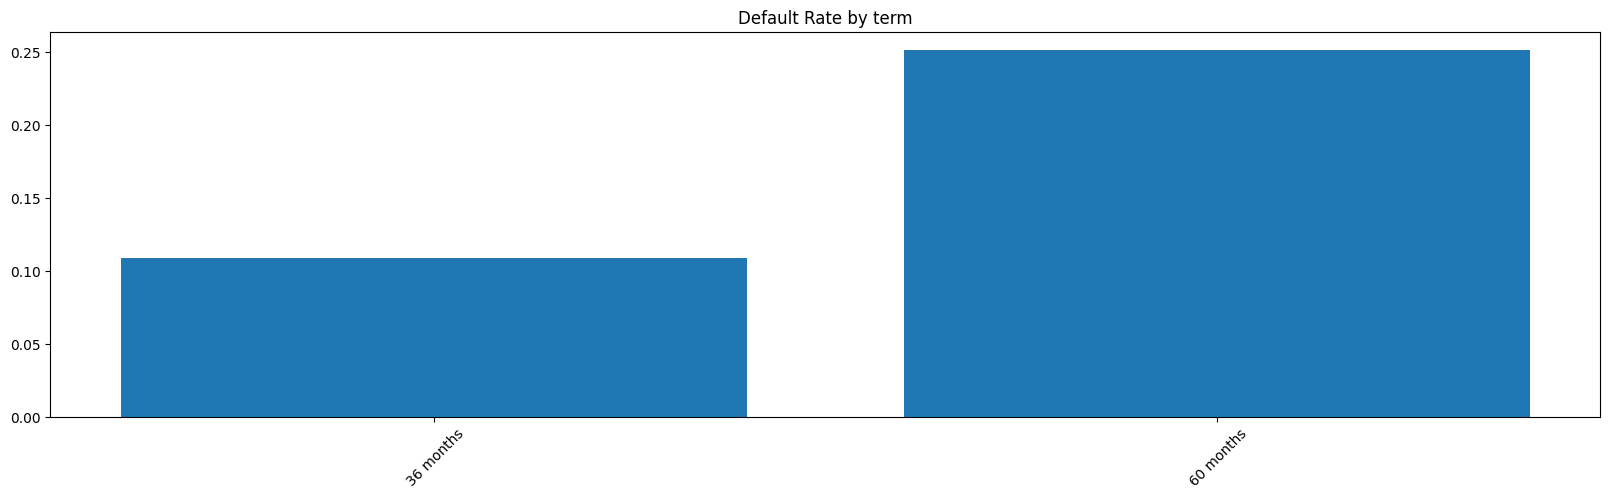

In [31]:
plot_loan_status(loans = filtered_loans, category = 'term');

> What is your `interpretation`? **`Double Click` and type in your interpretation here**\
> <font color = red> longer the term, higher the default </font>

#### `home_ownership`

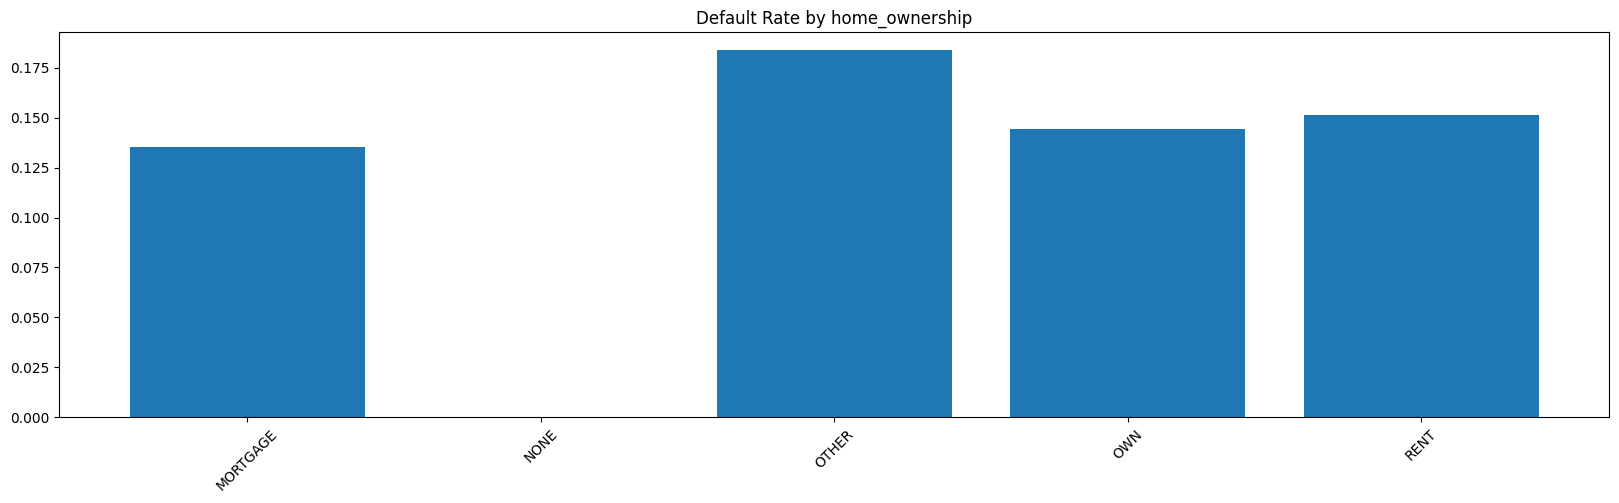

In [32]:
plot_loan_status(loans = filtered_loans, category = 'home_ownership');

> What is your `interpretation`? **`Double Click` and type in your interpretation here** \
> <font color = red> Other has the highest default rate, followed by rent, mortgage then own </font>

#### The role of `verification_status`?

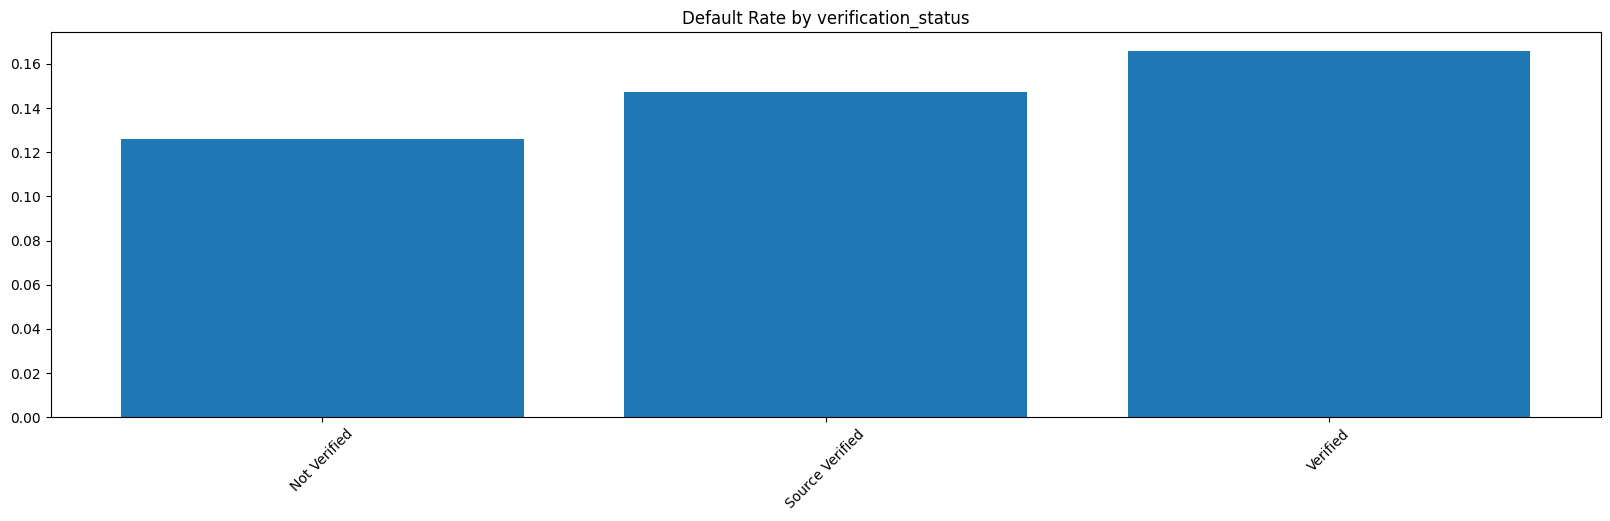

In [33]:
plot_loan_status(loans = filtered_loans, category = 'verification_status');

> What is your `interpretation`? **`Double Click` and type in your interpretation here** \
<font color = red> Verified has the higher default </font>

#### The role of Loan `purpose`?

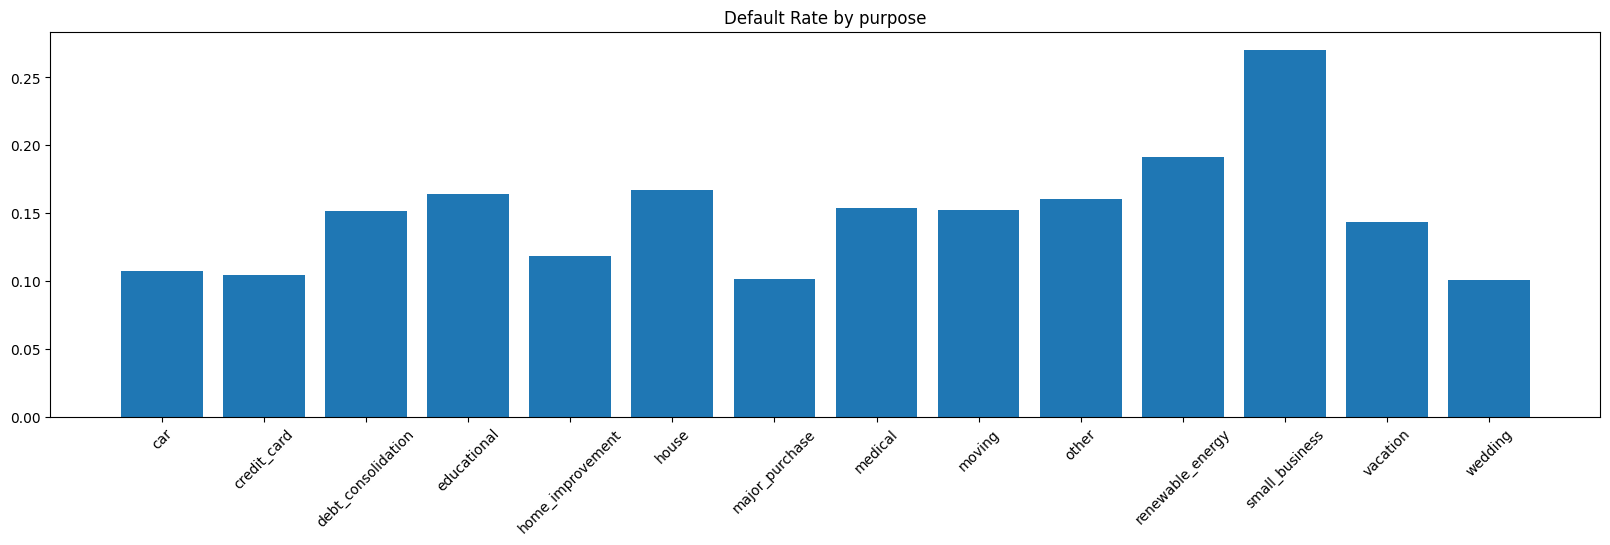

In [34]:
plot_loan_status(loans = filtered_loans, category = 'purpose');

> What is your `interpretation`? **`Double Click` and type in your interpretation here** \
> <font color = red> small businesses has the highest default, major purchase has the lowest, higher the default </font>

#### Question 4.3. How is the distribution of loans across time?

> Please convert the column `issue_d` into datetime and then extract year and month from it.

In [35]:
filtered_loans['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

> Yes, please use `lambda`.

In [36]:
filtered_loans['issue_d']  = (
    filtered_loans['issue_d']
    .apply(
        lambda x :
        pd.to_datetime(
        x, 
        format = '%b-%y'
        )
    )
)

> Please extract month and year from `issue_d`, using `lambda`.

In [37]:
filtered_loans['year'] = filtered_loans['issue_d'].apply(lambda x : x.year)
filtered_loans['month'] = filtered_loans['issue_d'].apply(lambda x : x.month)

> How would you examine the number of loans granted across `years`?

In [38]:
filtered_loans['year'].value_counts()

2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

You can see that the number of loans has increased steadily across years. 

> How would you examine the number of loans across months?

In [39]:
filtered_loans['month'].value_counts()

12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: month, dtype: int64

`Interpretation`?
> <font color = red> 4th Quarter is when the loan issuance is highest </font>

#### Compare the default rates across years.

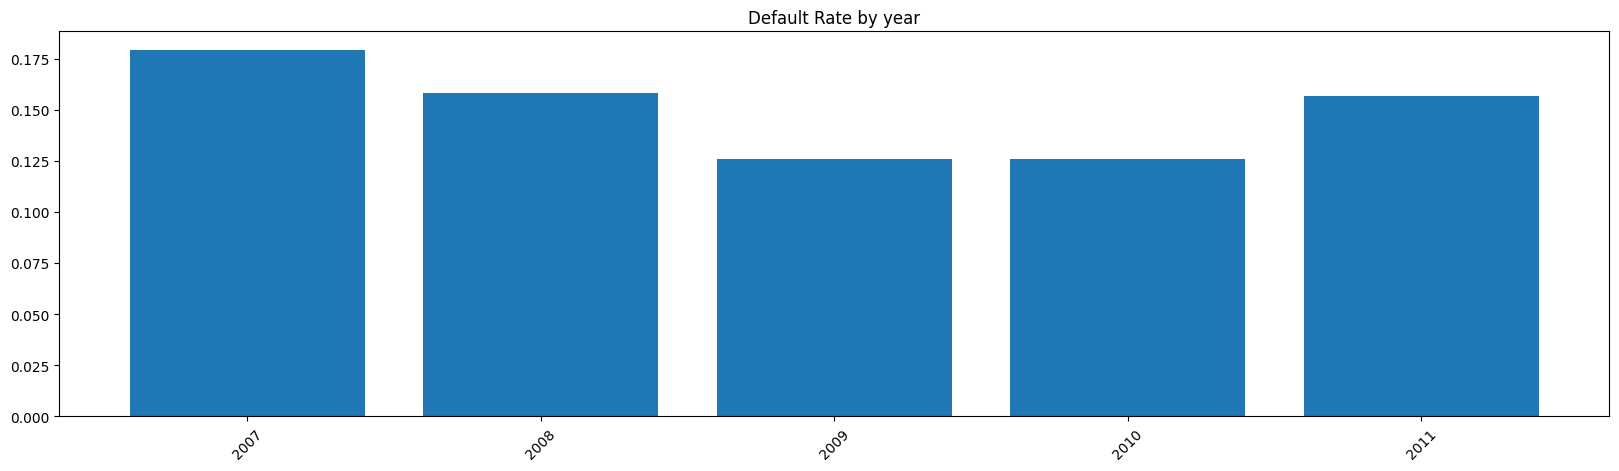

In [40]:
plot_loan_status(filtered_loans, 'year')

> `Interpretation`? \
> <font color = red> GFC had the highest default rates </font>

#### Let's compare default rates across months.

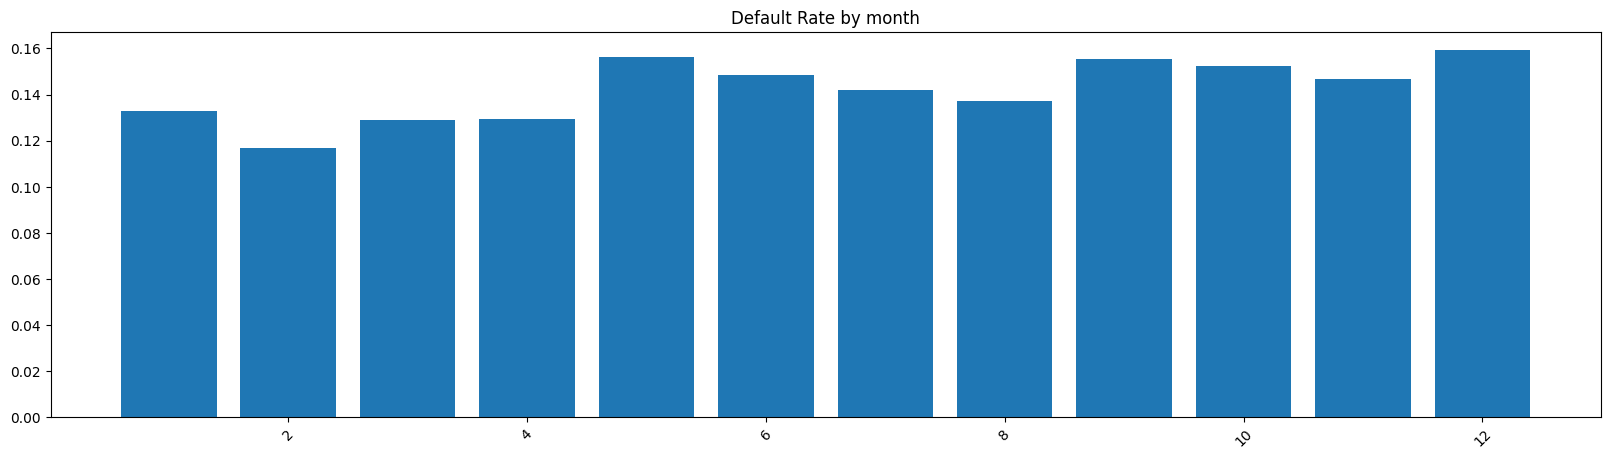

In [41]:
plot_loan_status(filtered_loans, 'month')

> `Interpretation`? \
> <font color = red> steady default rates ranging from 12-14% across months </font>

#### Question 4.4. Let's now analyse how the default rate varies across continuous variables.

> Loan Amount: `loan_amnt`

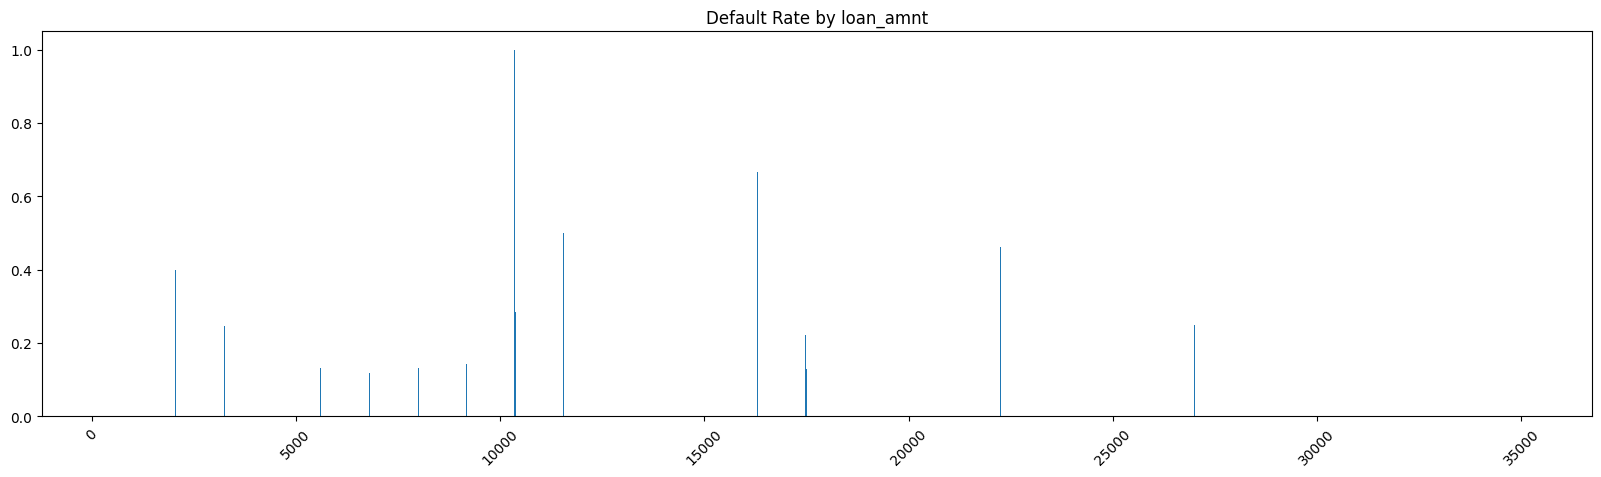

In [42]:
plot_loan_status(filtered_loans, 'loan_amnt')

> `Interpretation`? \
> <font color = red> nothing useful here </font>

> Another way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

> Let's create a categorical variable for the loan amount variable into small, medium, high, very high.

* loan_amount < 5000 `low`
* loan_amount >=5000 and loan_amount < 15000 `medium`
* loan_amount >= 15000 and loan_amount < 25000 `high`
* greater than 25000 `very high`

In [43]:
filtered_loans['binned_loans'] = (
    pd.cut(
        filtered_loans['loan_amnt'],
        bins = [0, 5_000, 15_000, 25_000, np.inf],
        labels = ['low', 'medium', 'high', 'very high']
    )
)

> Let's compare the default rates across loan amount type

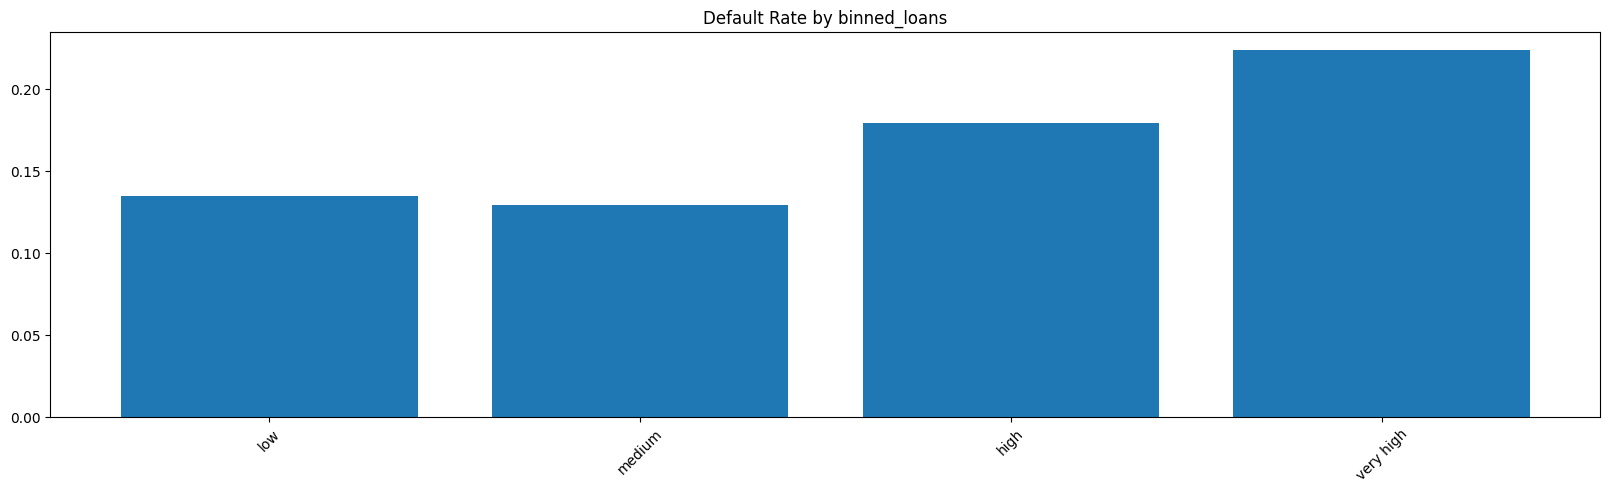

In [44]:
plot_loan_status(filtered_loans, 'binned_loans')

> `Interpretation`? \
> <font color = red> higher loan amounts have higher default rates </font>

#### Let's also convert funded amount invested to bins (using the same scheme from `loan_amount`)

In [45]:
filtered_loans['binned_funded_amnt'] = (
    pd.cut(
        filtered_loans['funded_amnt'],
        bins = [0, 5_000, 15_000, 25_000, np.inf],
        labels = ['low', 'medium', 'high', 'very high']
    )
)

> Visualize the results

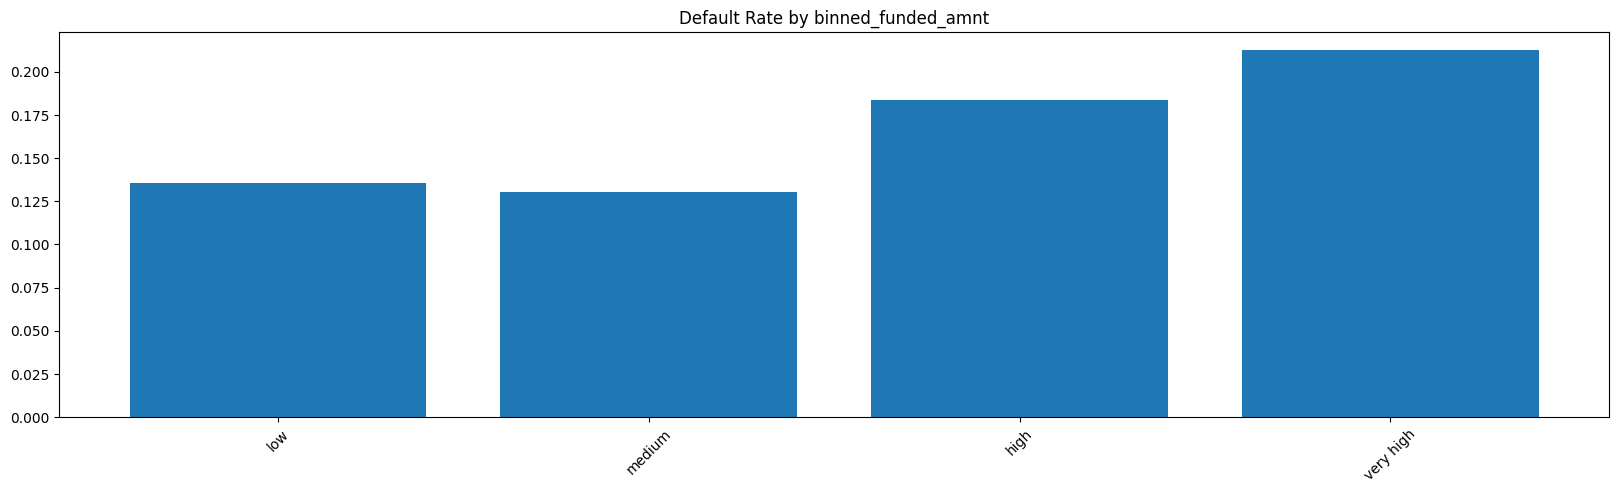

In [46]:
plot_loan_status(filtered_loans, 'binned_funded_amnt')

#### Interest Rate (int_rate)

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=15 `medium`
* greater than 15 `high`

> Use lambda for creating a new categorical variable.

> Let's compare default rates across rates of interest

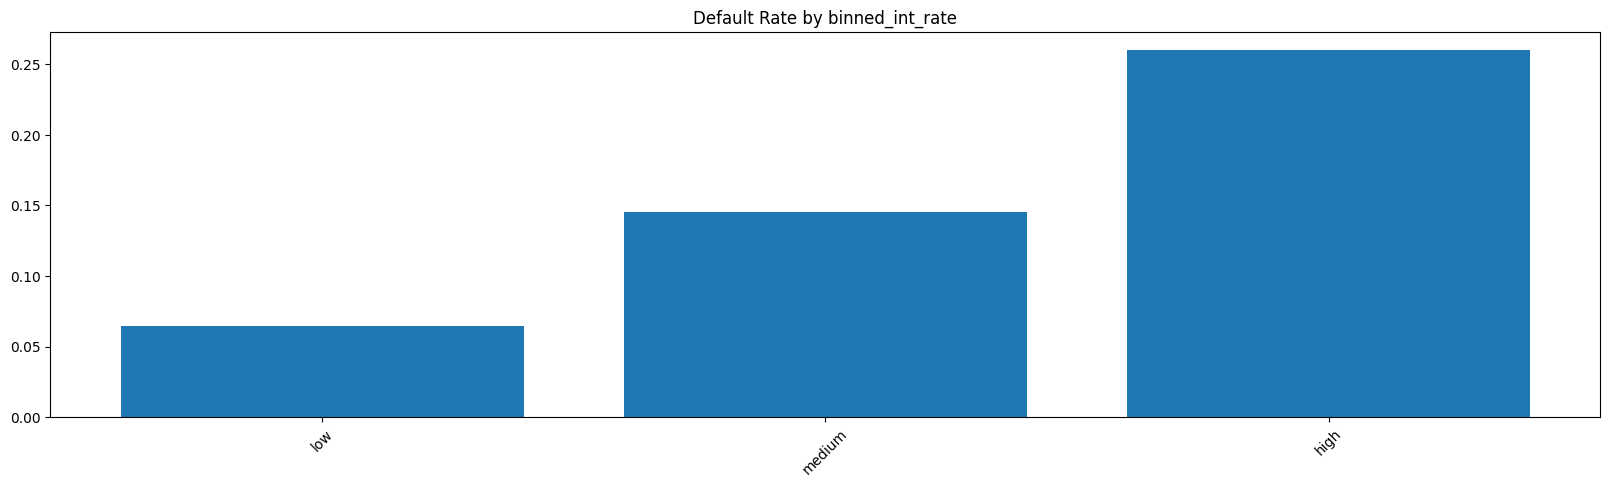

In [47]:
filtered_loans['binned_int_rate'] = (
    pd.cut(
        filtered_loans['int_rate'],
        bins = [0, 10, 15, np.inf],
        labels = ['low', 'medium', 'high']
    )
)

plot_loan_status(filtered_loans, 'binned_int_rate')

> `Interpretaion`? \
> <font color = red> higher the interest rate, higher the default </font>

#### debt-to-income (`dti`) ratio

> Please create a categorical variable of `dti` using your own function

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=20 `medium`
* greater than 20 `high`

> Use lambda for creating a new variable.

In [48]:
filtered_loans['binned_dti'] = (
    pd.cut(
        filtered_loans['dti'],
        bins = [0, 10, 20, np.inf],
        labels = ['low', 'medium', 'high']
    )
)

> Let's comparing default rates across debt to income ratio

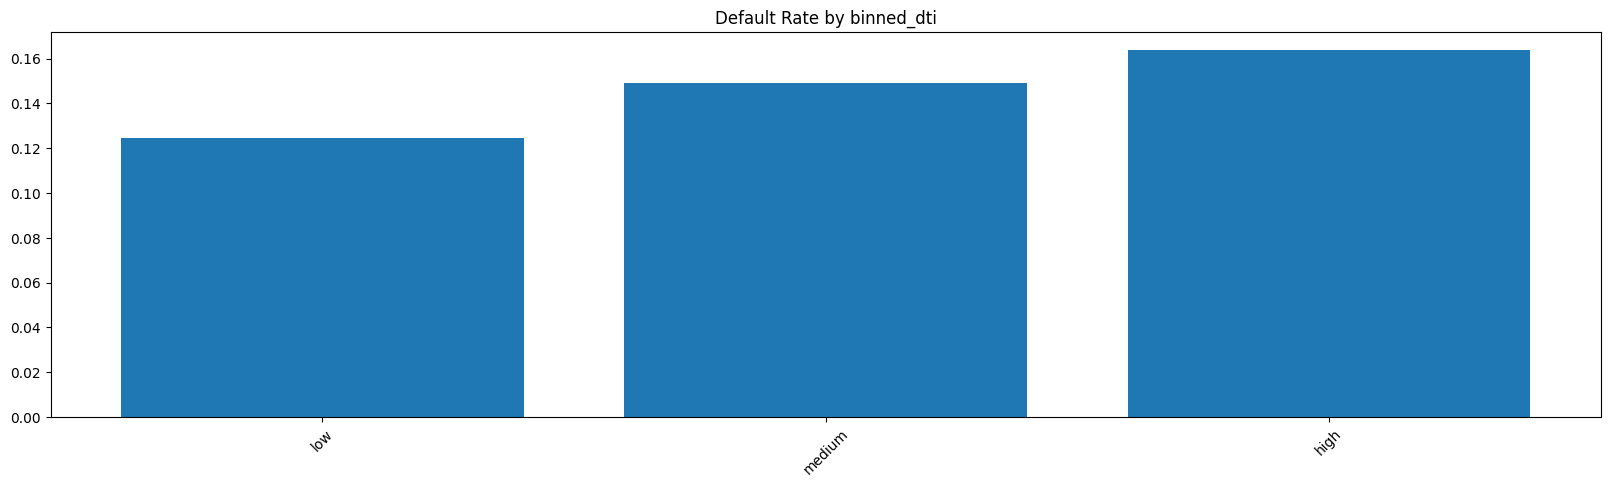

In [49]:
plot_loan_status(filtered_loans, 'binned_dti')

> `Interpretation`? \
> <font color = red> higher debt to income, higher default rate </font>

#### `funded_amount`

> Please create a categorical variable of `funded_amount` using your own function

> Use the following definitions for each categories.

- <= 5000 `low`
- funded_amount > 5000 and funded_amount <=15000 `medium`
- greater than 15000 `high`

> Use lambda for creating a new variable.

In [50]:
filtered_loans['binned_funded_amount'] = (
    pd.cut(
        filtered_loans['funded_amnt'],
        bins = [0, 5_000, 15_000, np.inf],
        labels = ['low', 'medium', 'high']
    )
)

#### `installment`

> Please create a categorical variable of `installment` using your own function

> Use the following definitions for each categories.

- installment <= 200 `low`
- installment > 200 and installment <= 400 `medium`
- installment > 400 and installment <= 600 `high`
- greater than 600 = `very high`

> Use lambda for creating a new variable.

In [51]:
filtered_loans['binned_installment'] = (
    pd.cut(
        filtered_loans['installment'],
        bins = [0, 200, 400, 600, np.inf],
        labels = ['low', 'medium', 'high', 'very high']
    )
)

> Let's compare default rates across installment

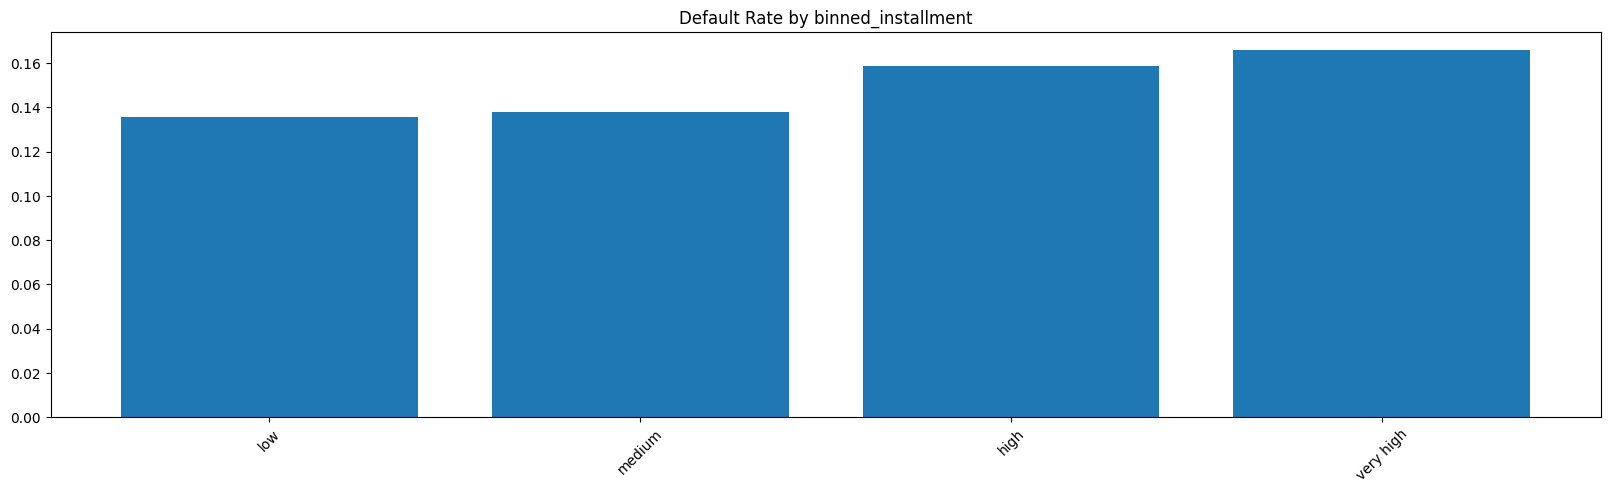

In [52]:
plot_loan_status(filtered_loans, 'binned_installment')

> `Interpretation` \
> <font color = red>  higher installments, highest default rate </font>

#### How about `annual_income`? 

> Please create a categorical variable of annual_income using your own function

> Use the following definitions for each categories.

- less than or equal to 50k = `low`
- greater than 50k less than equal to 100 k = `medium`
- greater than 100k less than equal to 150k = `high`
- greater than 150k = `very high`

> Use lambda for creating a new variable.

In [53]:
filtered_loans['binned_annual_income'] = (
    pd.cut(
        filtered_loans['annual_inc'],
        bins = [0, 50_000, 100_000, 150_000, np.inf],
        labels = ['low', 'medium', 'high', 'very high']
    )
)

> Visualize the results.

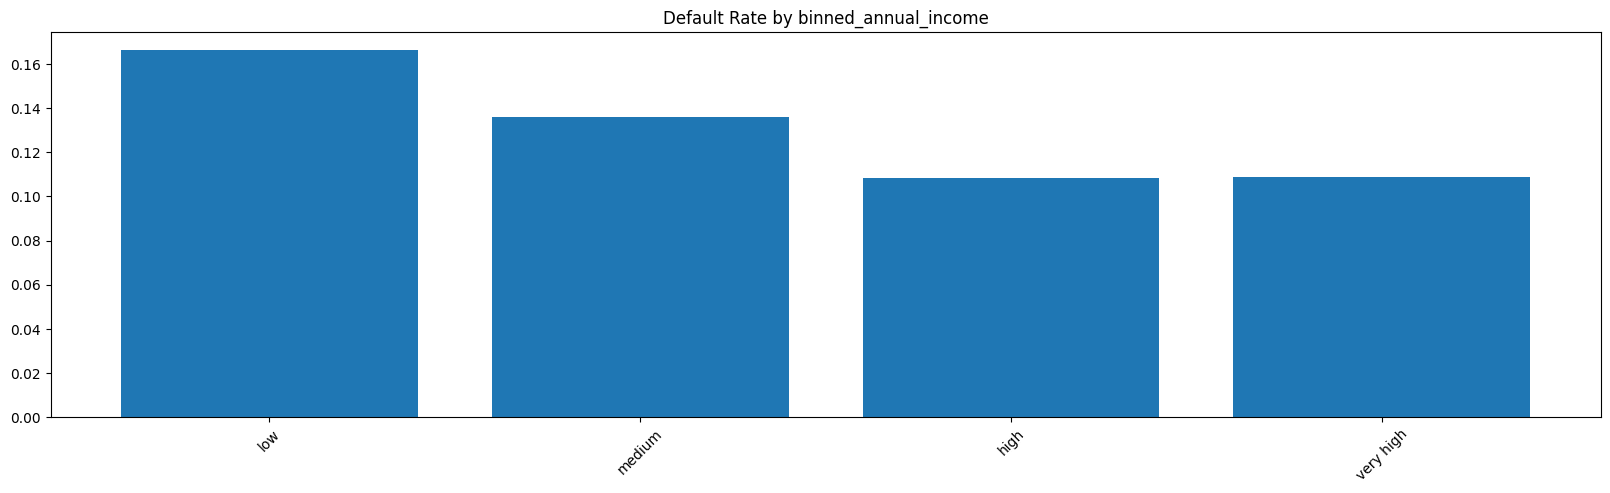

In [54]:
plot_loan_status(filtered_loans, 'binned_annual_income')

> What's your interpretation? \
> <font color = red> lower income, higher default rates </font>

#### `Employment Length`

> First, let's drop the missing value observations in `emp_length`

In [55]:
filtered_loans['emp_length'].isna().sum()

0

> Please create a categorical variable of `emp_length` using your own function

> Use the following definitions for each categories.

* emp_length <= 1 `fresher`
* emp_length > 1 and emp_length <=3 `junior`
* emp_length > 3 and emp_length <=7 `senior`
* greater than 7 `expert`

> Use lambda for creating a new variable.

In [56]:
filtered_loans['binned_emp_length'] = (
    pd.cut(
        filtered_loans['emp_length'],
        bins = [0, 1, 3, 7, np.inf],
        labels = ['fresher', 'junior', 'senior', 'expert']
    )
)

> Visualize the results

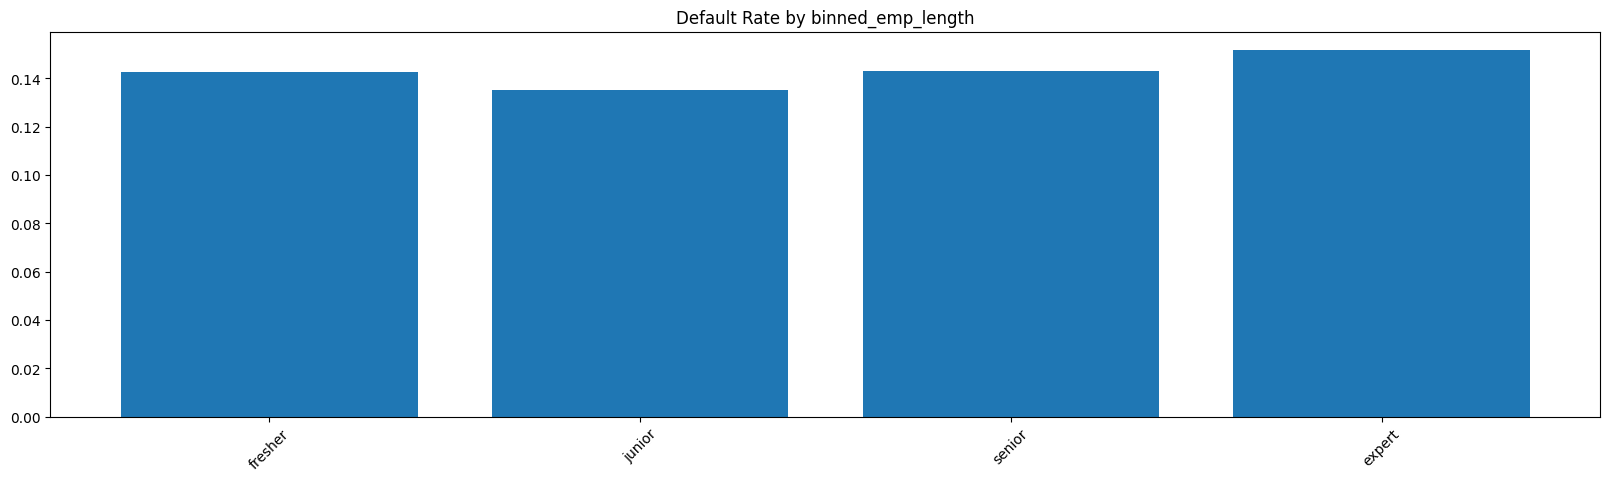

In [57]:
plot_loan_status(filtered_loans, 'binned_emp_length')

> What's your `interetation`? \
> <font color = red> default rate is flat across employment length </font>

### Question 5. Segmented Univariate Analysis



#### Question 5.1. A quick glance on Loan Purpose (`purpose`) using your first function :)

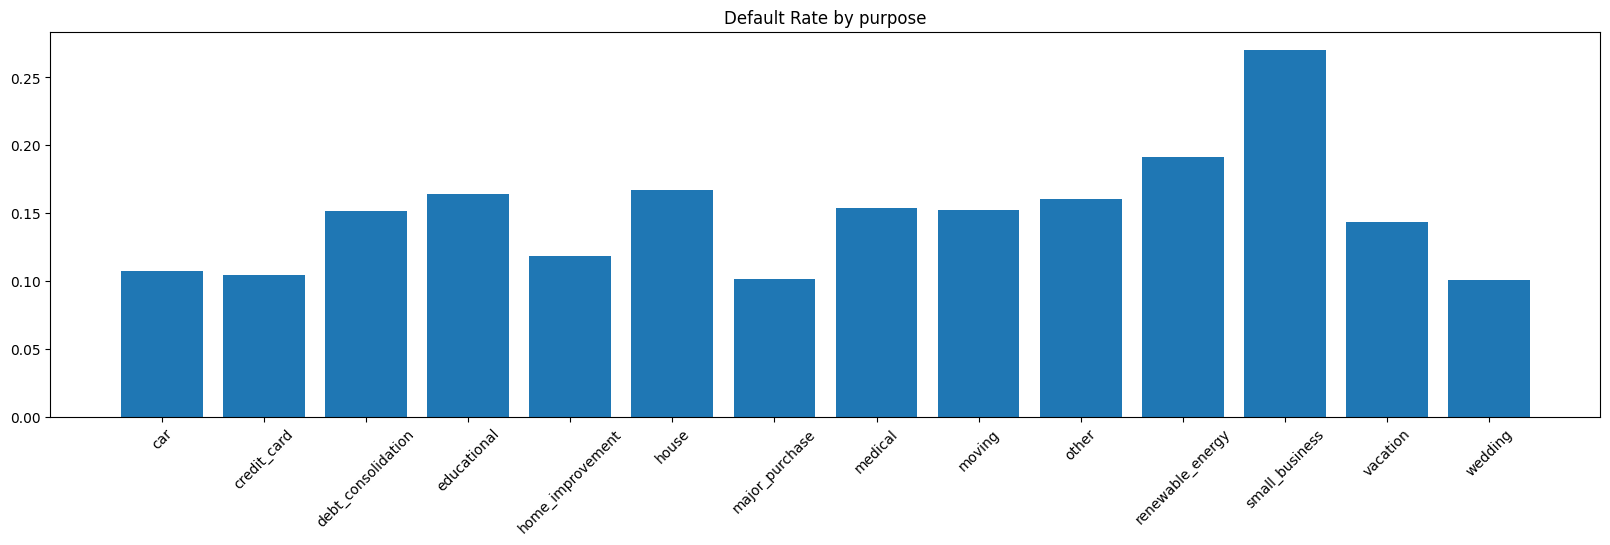

In [58]:
plot_loan_status(filtered_loans, 'purpose')

`Interpretation`? \
> <font color = red> small businesses have the highest default rate, major purchase the lowest </font>

#### Question 5.2. Now let's segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

> Let's take a look at the number of loans for each type (purpose) of the loan.

In [59]:
filtered_loans['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

> Please analyze the top 4 types of loans based on purpose

#### Let's filter the df for the 4 types of loans mentioned above

In [60]:
purpose_filtered_loans = (
    filtered_loans
    [
        filtered_loans['purpose']
        .isin(
            filtered_loans['purpose']
            .value_counts()
            .head(4)
            .index
        )
    ]
)

#### Visualize the number of loans by purpose 

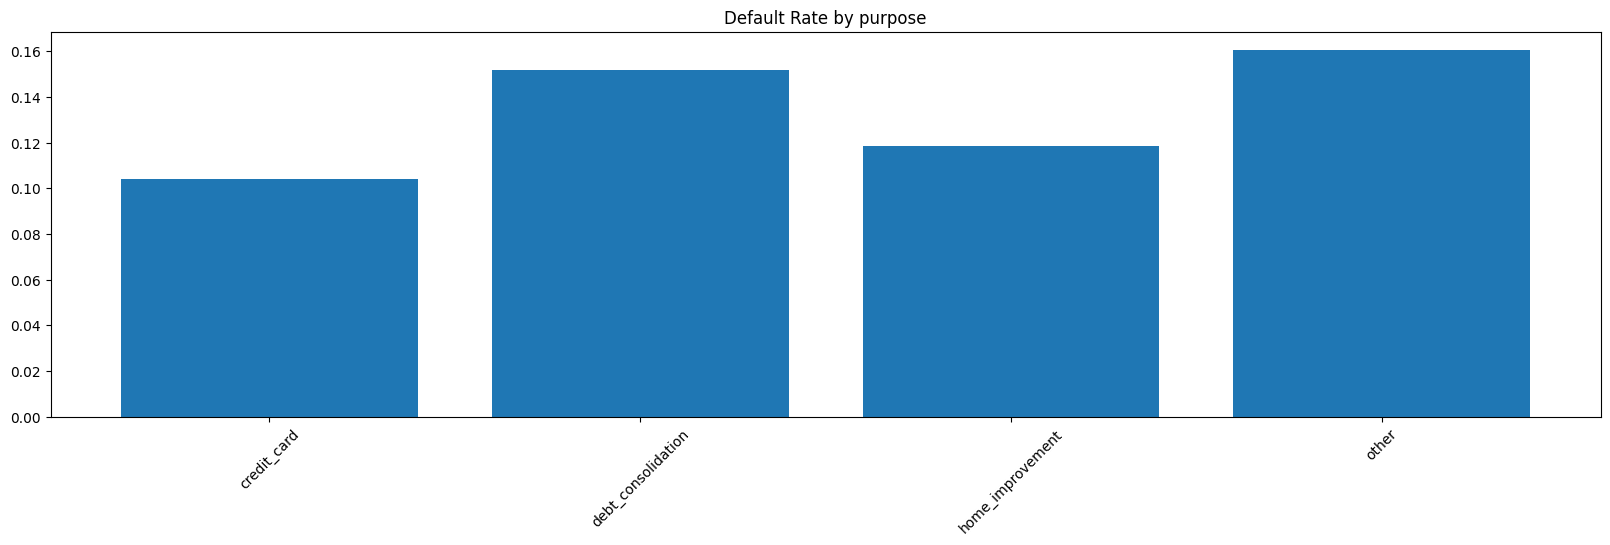

In [61]:
plot_loan_status(purpose_filtered_loans, 'purpose')

> let's now compare the default rates (`loan_status`) across two types of categorical variables;
> - `purpose` of loan (constant)
> - another categorical variable (which changes)

> You should be able to write your own function which takes a categorical variable and plots the default rate segmented by purpose.

> Please **create your function** named `plot_segmented`

In [62]:
def plot_segmented(loans, category):
    default_rates_by_category = (
        loans
        .groupby(['purpose', category])
        .agg(
            no_default = ('loan_status', 'sum'), 
            n = ('loan_status', 'count')
        )
    )

    default_rates_by_category['default'] = default_rates_by_category.eval('`n` - `no_default`')
    default_rates_by_category['default_rate'] = default_rates_by_category.eval('`default` / `n`')

    default_rates_by_category.unstack(level = 0)['default_rate'].plot(kind = 'bar', subplots = True, figsize=(20, 10))

#### Grade of Loan (`grade`)

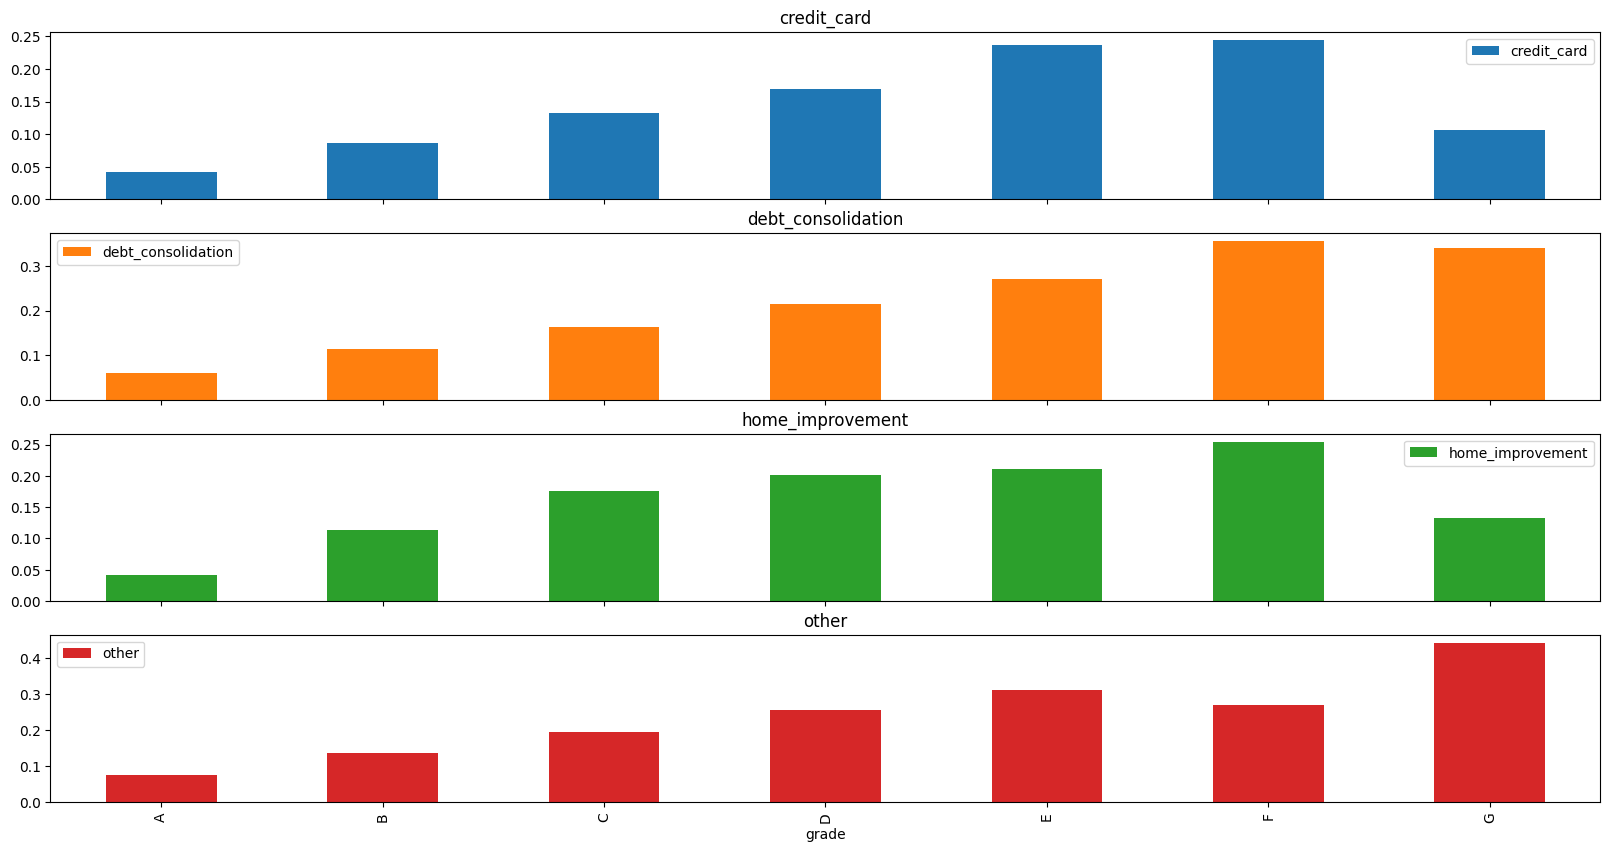

In [63]:
plot_segmented(purpose_filtered_loans, 'grade');

#### home ownership(`home_ownership`)

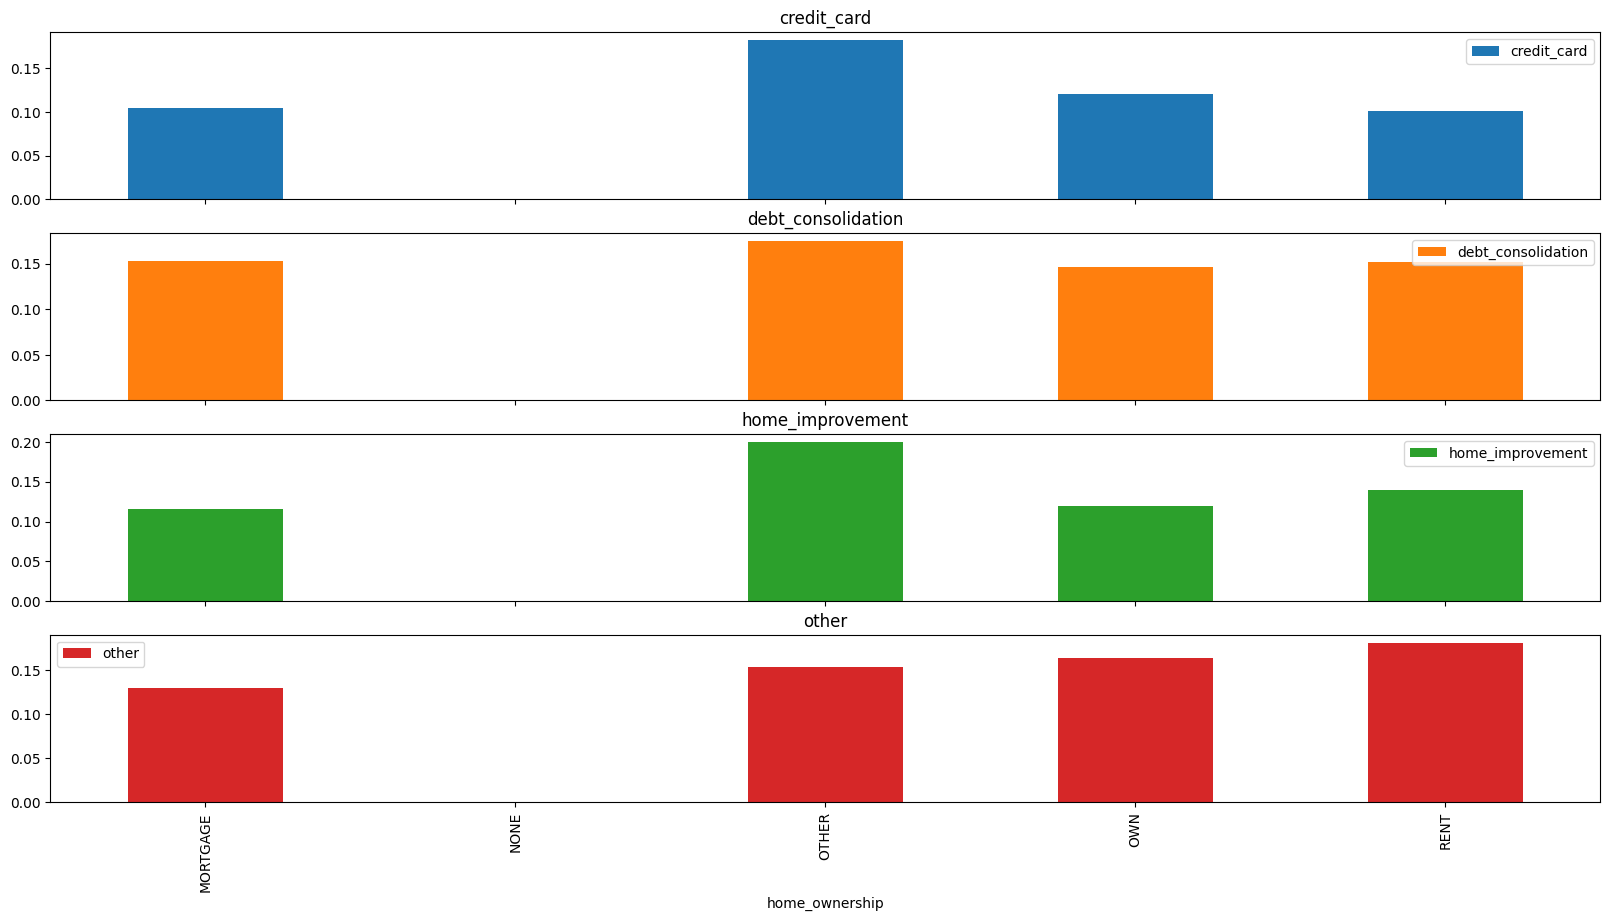

In [64]:
plot_segmented(purpose_filtered_loans, 'home_ownership');

#### `year`

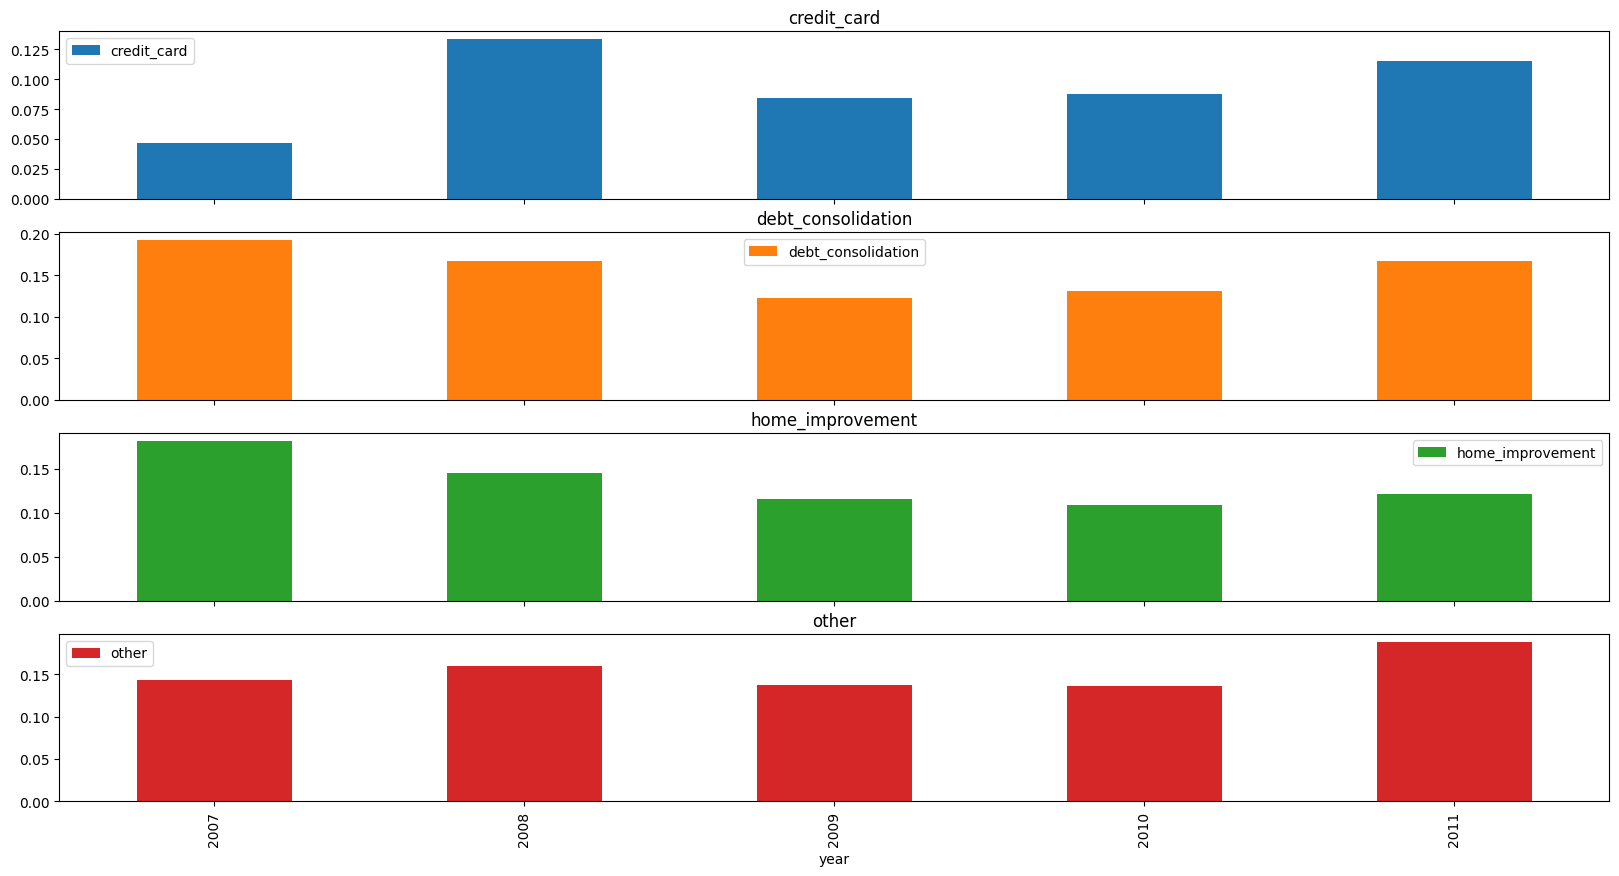

In [65]:
plot_segmented(purpose_filtered_loans, 'year');

#### `emp_length`

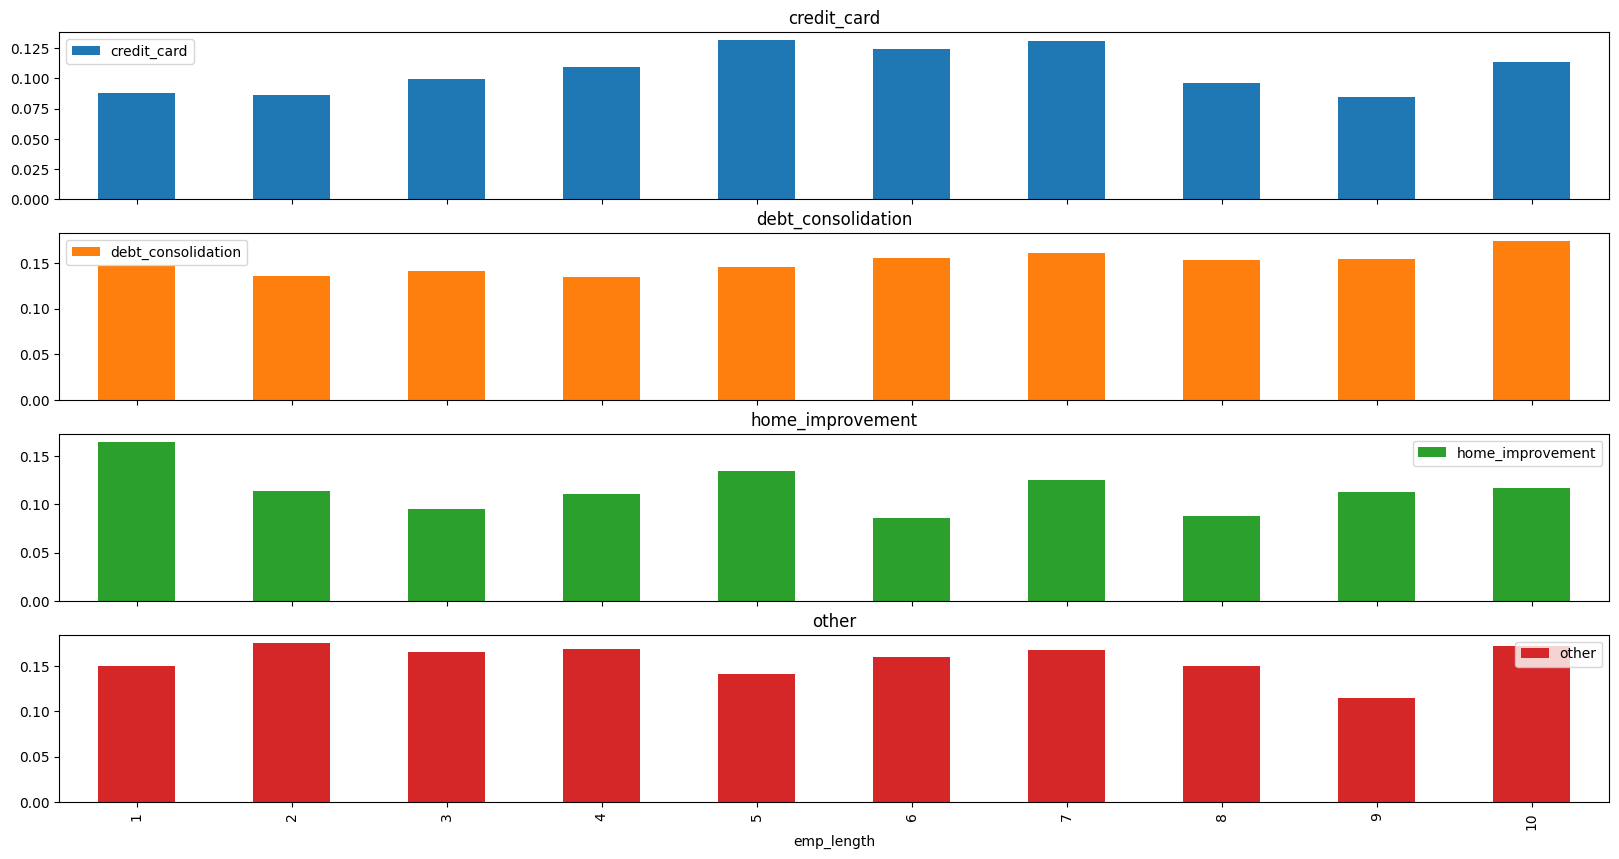

In [66]:
plot_segmented(purpose_filtered_loans, 'emp_length');

> Loan Amount (`loan_amnt`) 

> How's the pattern compared with loan purposes?

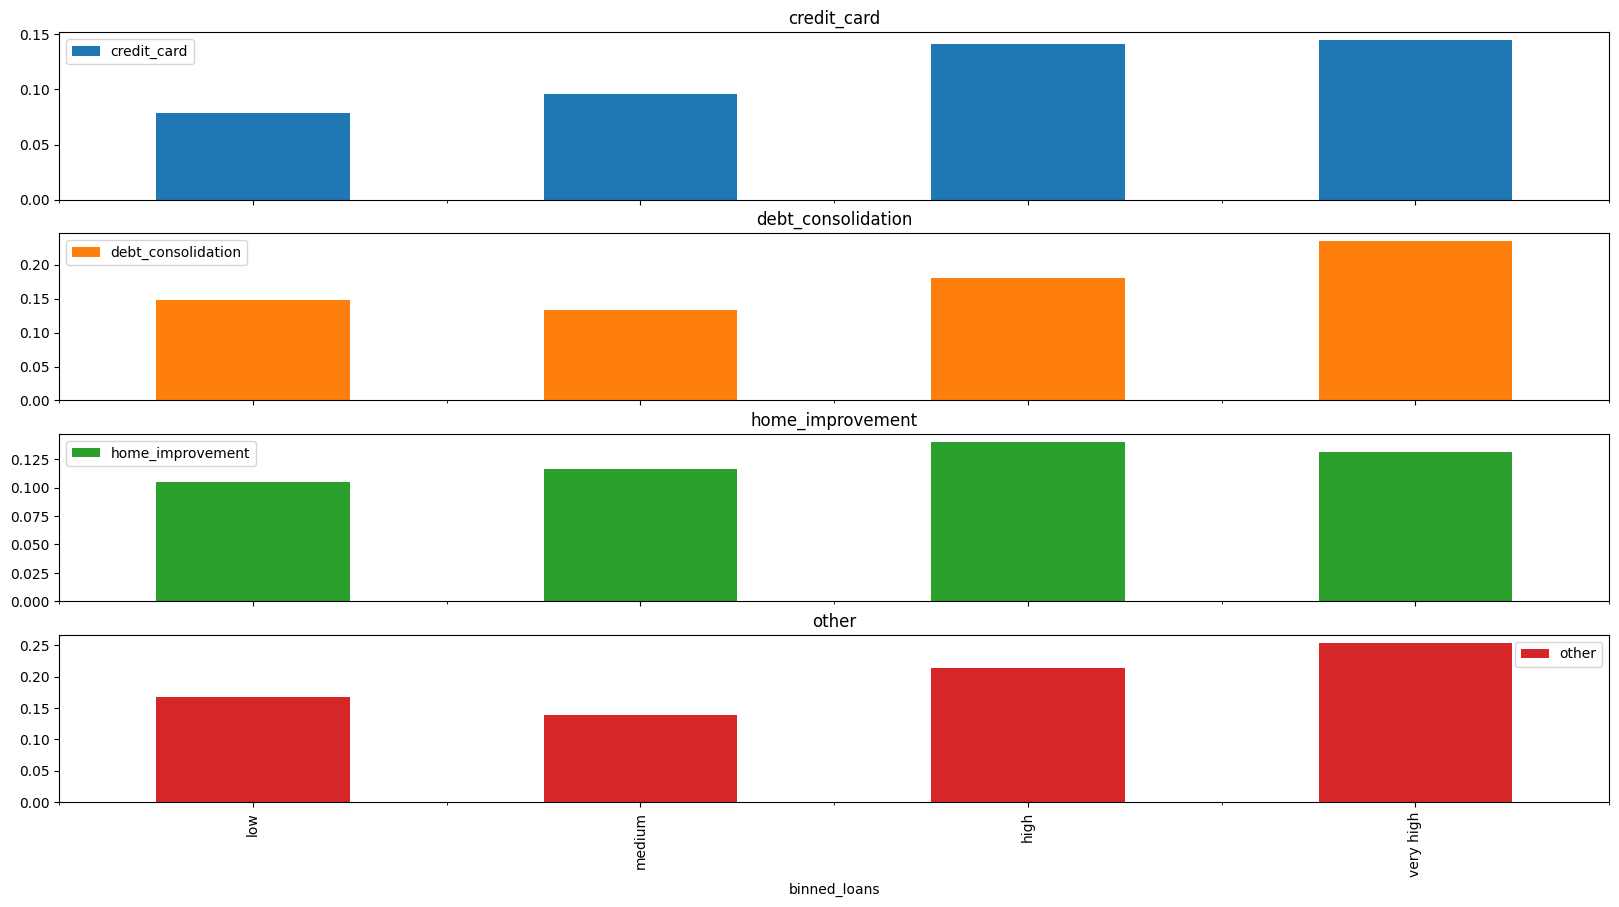

In [67]:
plot_segmented(purpose_filtered_loans, 'binned_loans');

> interest rate (`int_rate`)

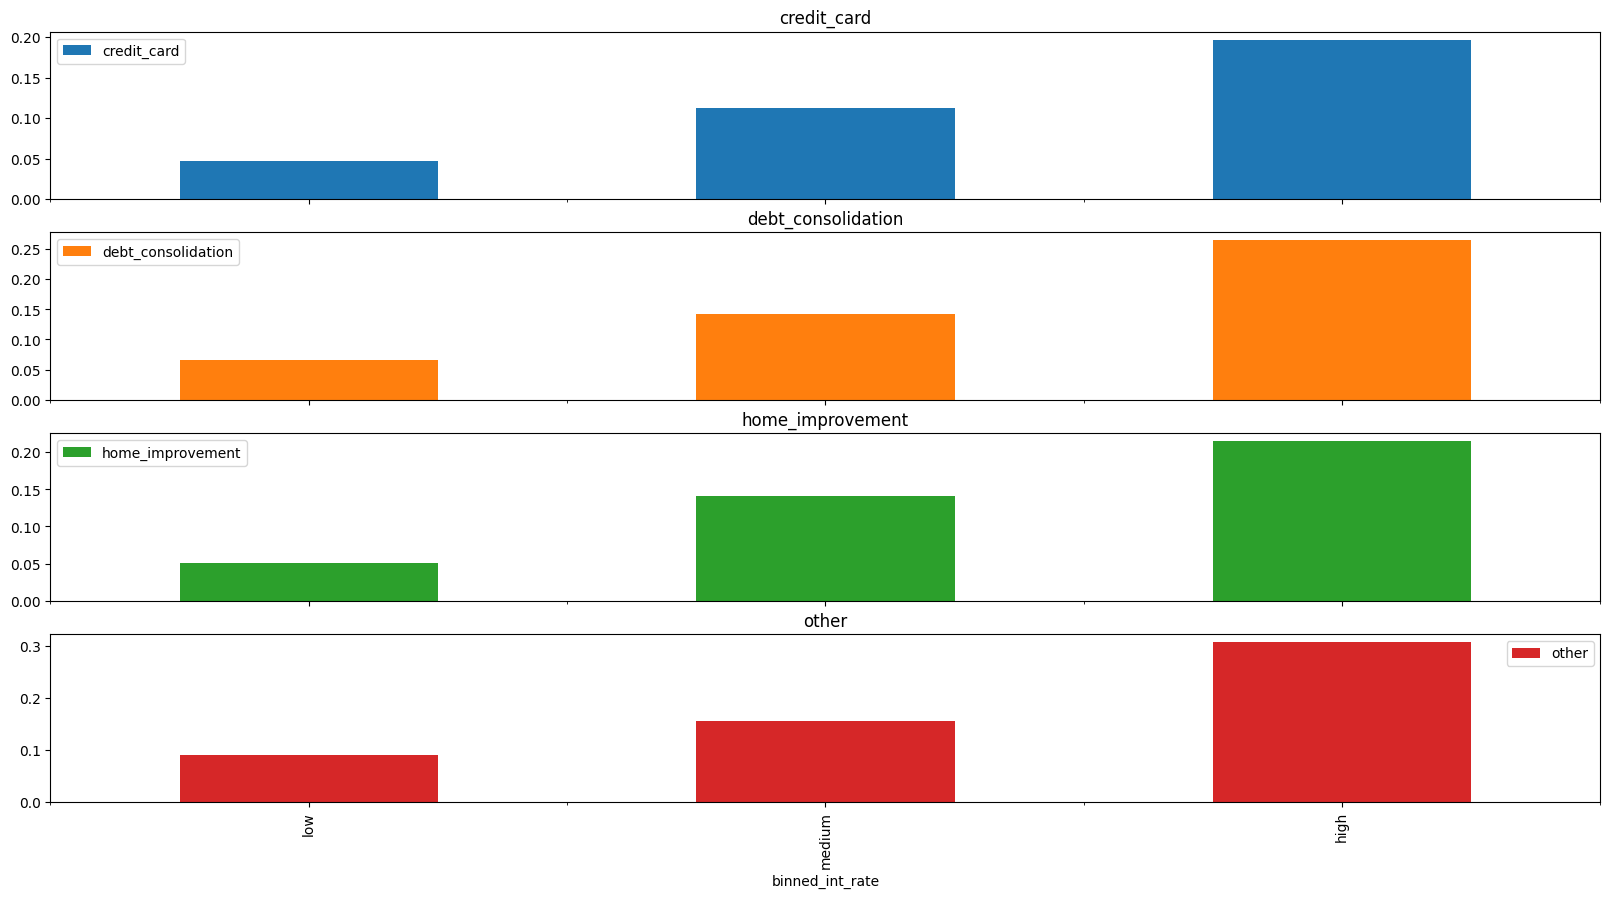

In [68]:
plot_segmented(purpose_filtered_loans, 'binned_int_rate');

> `installment`

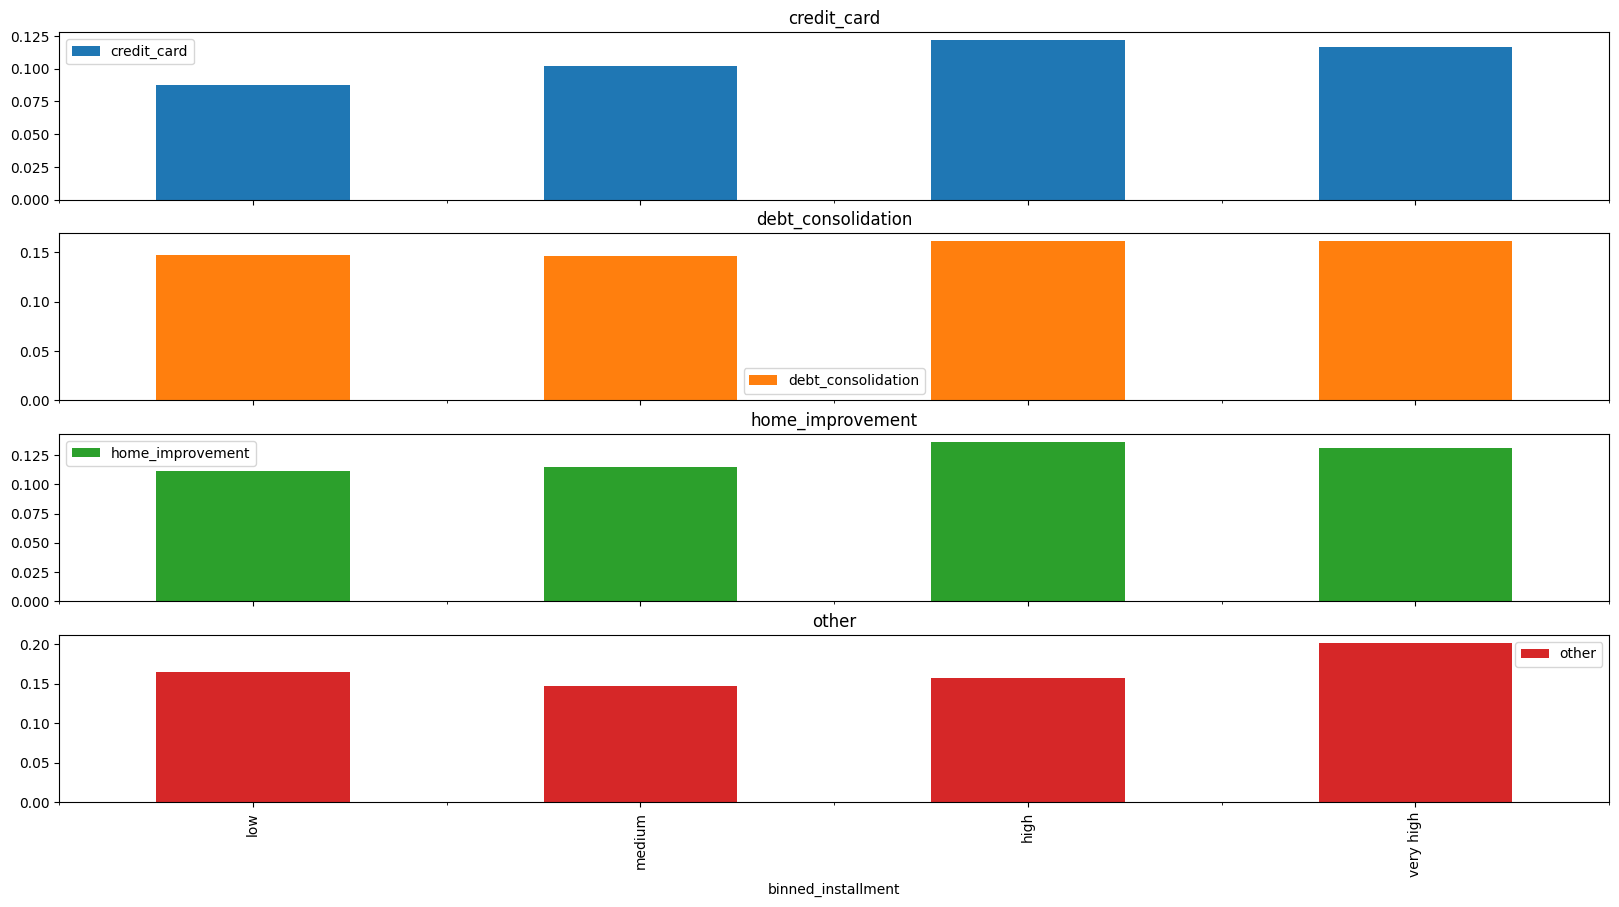

In [69]:
plot_segmented(purpose_filtered_loans, 'binned_installment');

> debt-to-income (`dti`) ratio

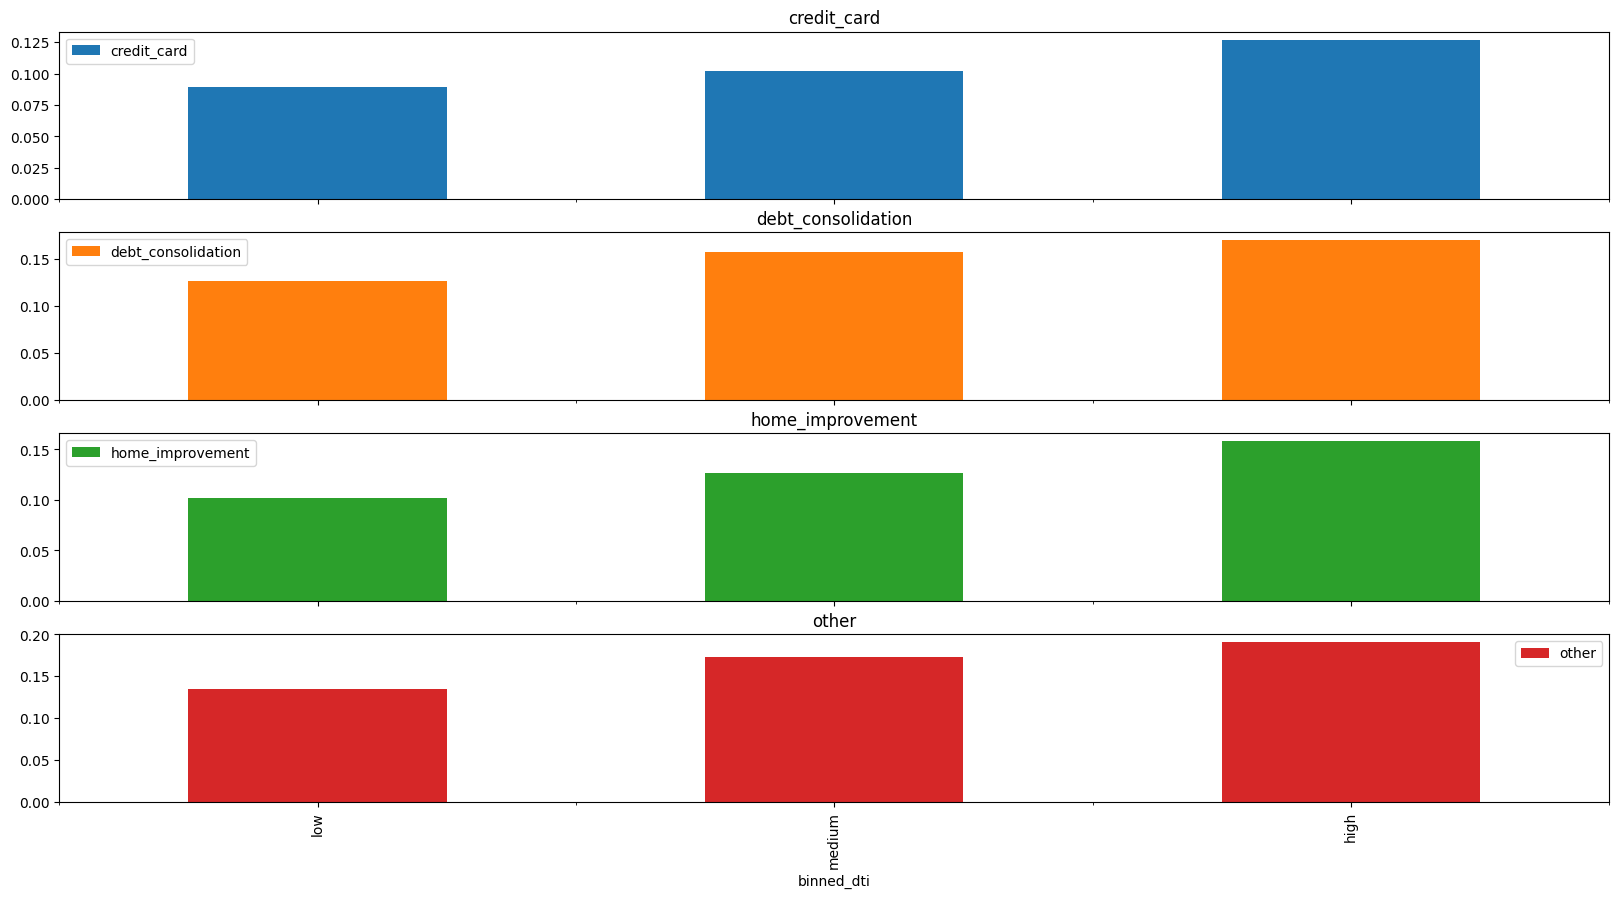

In [70]:
plot_segmented(purpose_filtered_loans, 'binned_dti');

> Let's have a look at the role of `annual_income`

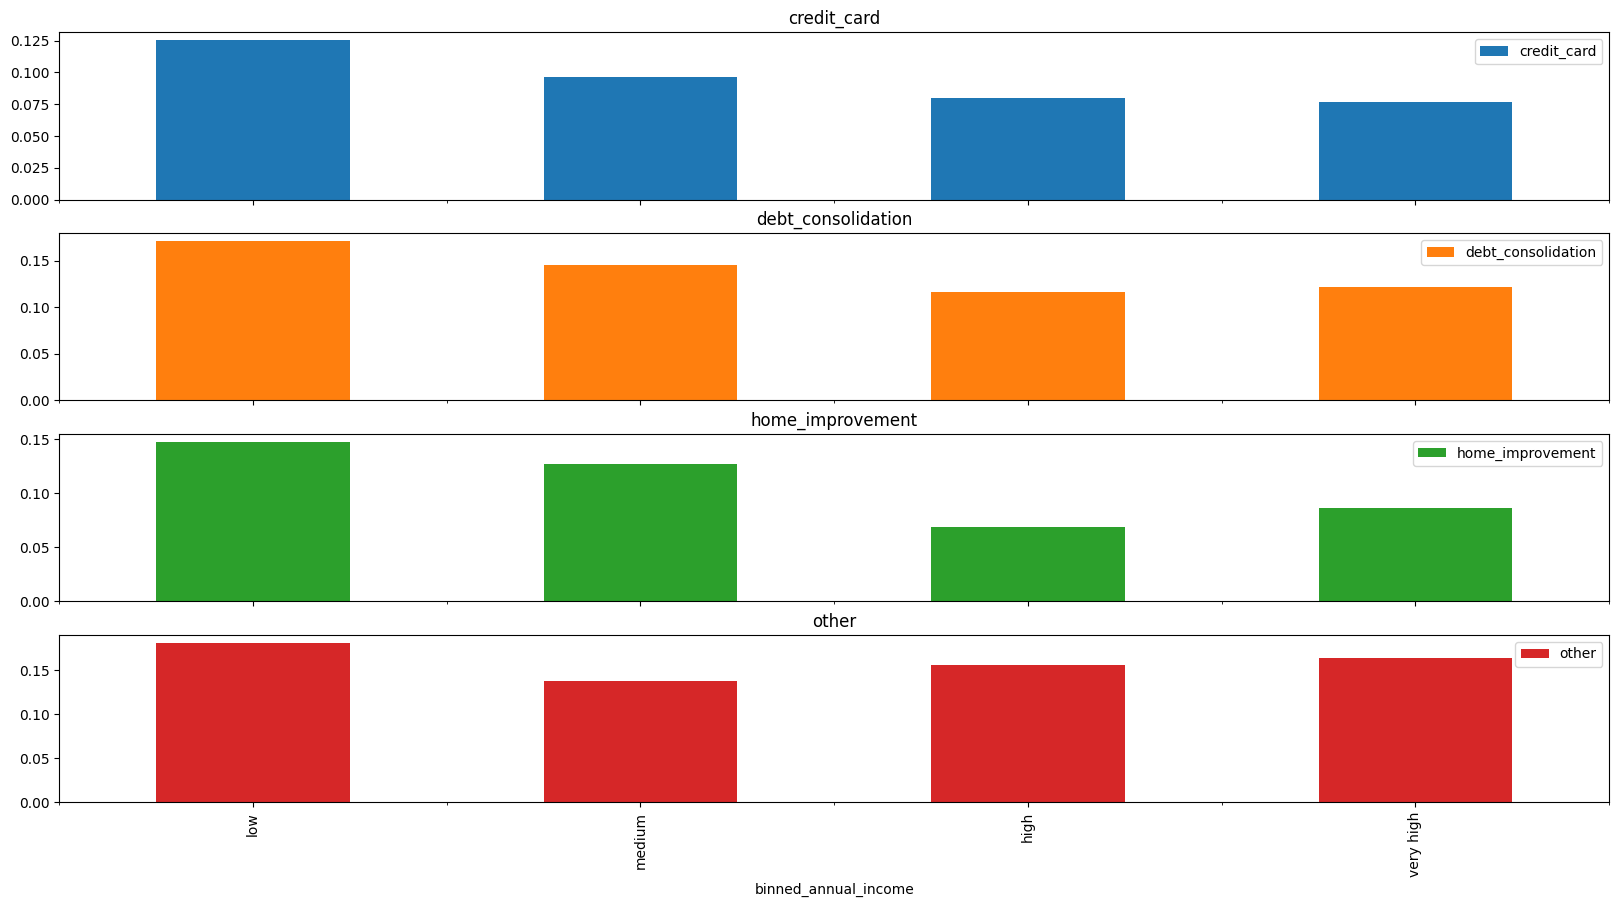

In [71]:
plot_segmented(purpose_filtered_loans, 'binned_annual_income');

> A good way to quantify the effect of a categorical variable on default rate is to see `how much does the default rate vary across the categories`. 

> Let's see an example using `annual_inc` as the categorical variable.

> How would you examine the variation of default rate across `annual_inc`?

#### Question 5.3 Write a function which takes in a categorical variable and computed the average default rate across the categories.

> You can also compute the `difference between the highest and the lowest default rate` across the categories, which is a decent metric indicating the effect of the varaible on default rate.

> Please create your own function named `diff_rate`.

In [72]:
def diff_rate(loans, category):
    default_rates_by_category = (
        loans
        .groupby(category)
        .agg(
            no_default = ('loan_status', 'sum'), 
            n = ('loan_status', 'count')
        )
    )

    default_rates_by_category['default'] = default_rates_by_category.eval('`n` - `no_default`')
    default_rates_by_category['default_rate'] = default_rates_by_category.eval('`default` / `n`')
    
    return default_rates_by_category.eval('`default_rate`.max() - `default_rate`.min()')

> Please use the function and draw some insights :)

In [73]:
diff_rate(purpose_filtered_loans, 'binned_annual_income')

0.057976752671617074

> Thus, there is a ***`5.8%`*** increase in default rate as you go from high to low annual income. 

##### You might want to compute this difference for all the variables and roughly identify the ones that affect default rate the most.

### Variables in the Dataset

- `acc_now_delinq`	The number of accounts on which the borrower is now delinquent.
- `acc_open_past_24mths`	Number of trades opened in past 24 months.
- addr_state`	The state provided by the borrower in the loan application
- `all_util`	Balance to credit limit on all trades
- `annual_inc`	The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint`	The combined self-reported annual income provided by the co-borrowers during registration
- `application_type`	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `avg_cur_bal`	Average current balance of all accounts
- `bc_open_to_buy`	Total open to buy on revolving bankcards.
- `bc_util`	Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- `chargeoff_within_12_mths`	Number of charge-offs within 12 months
- `collection_recovery_fee`	post charge off collection fee
- `collections_12_mths_ex_med`	Number of collections in 12 months excluding medical collections
- `delinq_2yrs`	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `delinq_amnt`	The past-due amount owed for the accounts on which the borrower is now delinquent.
- `desc`	Loan description provided by the borrower
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `dti_joint`	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `earliest_cr_line`	The month the borrower's earliest reported credit line was opened
- `emp_length`	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- `emp_title`	The job title supplied by the Borrower when applying for the loan.*
- `fico_range_high`	The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low`	The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt`	The total amount committed to that loan at that point in time.
- `funded_amnt_inv`	The total amount committed by investors for that loan at that point in time.
- `grade`	LC assigned loan grade
- `home_ownership`	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `id`	A unique LC assigned ID for the loan listing.
- `il_util`	Ratio of total current balance to high credit/credit limit on all install acct
- `initial_list_status`	The initial listing status of the loan. Possible values are – W, F
- `inq_fi`	Number of personal finance inquiries
- `inq_last_12m`	Number of credit inquiries in past 12 months
- `inq_last_6mths`	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `installment`	The monthly payment owed by the borrower if the loan originates.
- `int_rate`	Interest Rate on the loan
- `issue_d`	The month which the loan was funded
- `last_credit_pull_d`	The most recent month LC pulled credit for this loan
- `last_fico_range_high`	The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low`	The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt`	Last total payment amount received
- `last_pymnt_d`	Last month payment was received
- `loan_amnt`	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- `loan_status`	Current status of the loan
- `max_bal_bc`	Maximum current balance owed on all revolving accounts
- `member_id`	A unique LC assigned Id for the borrower member.
- `mo_sin_old_il_acct`	Months since oldest bank installment account opened
- `mo_sin_old_rev_tl_op`	Months since oldest revolving account opened
- `mo_sin_rcnt_rev_tl_op`	Months since most recent revolving account opened
- `mo_sin_rcnt_tl`	Months since most recent account opened
- `mort_acc`	Number of mortgage accounts.
- `mths_since_last_delinq`	The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog`	Months since most recent 90-day or worse rating
- `mths_since_last_record`	The number of months since the last public record.
- `mths_since_rcnt_il`	Months since most recent installment accounts opened
- `mths_since_recent_bc`	Months since most recent bankcard account opened.
- `mths_since_recent_bc_dlq`	Months since most recent bankcard delinquency
- `mths_since_recent_inq`	Months since most recent inquiry.
- `mths_since_recent_revol_delinq`	Months since most recent revolving delinquency.
- `next_pymnt_d`	Next scheduled payment date
- `num_accts_ever_120_pd`	Number of accounts ever 120 or more days past due
- `num_actv_bc_tl`	Number of currently active bankcard accounts
- `num_actv_rev_tl`	Number of currently active revolving trades
- `num_bc_sats`	Number of satisfactory bankcard accounts
- `num_bc_tl`	Number of bankcard accounts
- `num_il_tl`	Number of installment accounts
- `num_op_rev_tl`	Number of open revolving accounts
- `num_rev_accts`	Number of revolving accounts
- `num_rev_tl_bal_gt_0`	Number of revolving trades with balance >0
- `num_sats`	Number of satisfactory accounts
- `num_tl_120dpd_2m`	Number of accounts currently 120 days past due (updated in past 2 months)
- `num_tl_30dpd`	Number of accounts currently 30 days past due (updated in past 2 months)
- `num_tl_90g_dpd_24m`	Number of accounts 90 or more days past due in last 24 months
- `num_tl_op_past_12m`	Number of accounts opened in past 12 months
- `open_acc`	The number of open credit lines in the borrower's credit file.
- `open_acc_6m`	Number of open trades in last 6 months
- `open_il_12m`	Number of installment accounts opened in past 12 months
- `open_il_24m`	Number of installment accounts opened in past 24 months
- `open_il_6m`	Number of currently active installment trades
- `open_rv_12m`	Number of revolving trades opened in past 12 months
- `open_rv_24m`	Number of revolving trades opened in past 24 months
- `out_prncp`	Remaining outstanding principal for total amount funded
- `out_prncp_inv`	Remaining outstanding principal for portion of total amount funded by investors
- `pct_tl_nvr_dlq`	Percent of trades never delinquent
- `percent_bc_gt_75`	Percentage of all bankcard accounts > 75% of limit.
- `policy_code`	publicly available policy_code=1; new products not publicly available policy_code=2"
- `pub_rec`	Number of derogatory public records
- `pub_rec_bankruptcies`	Number of public record bankruptcies
- `purpose`	A category provided by the borrower for the loan request. 
- `pymnt_plan`	Indicates if a payment plan has been put in place for the loan
- `recoveries`	post charge off gross recovery
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- `sub_grade`	LC assigned loan subgrade
- `tax_liens`	Number of tax liens
- `term`	The number of payments on the loan. Values are in months and can be either 36 or 60.
- `title`	The loan title provided by the borrower
- `tot_coll_amt`	Total collection amounts ever owed
- `tot_cur_bal`	Total current balance of all accounts
- `tot_hi_cred_lim`	Total high credit/credit limit
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `total_bal_ex_mort`	Total credit balance excluding mortgage
- `total_bal_il`	Total current balance of all installment accounts
- `total_bc_limit`	Total bankcard high credit/credit limit
- `total_cu_tl`	Number of finance trades
- `total_il_high_credit_limit`	Total installment high credit/credit limit
- `total_pymnt`	Payments received to date for total amount funded
- `total_pymnt_inv`	Payments received to date for portion of total amount funded by investors
- `total_rec_int`	Interest received to date
- `total_rec_late_fee`	Late fees received to date
- `total_rec_prncp`	Principal received to date
- `total_rev_hi_lim`  	Total revolving high credit/credit limit
- `url`	URL for the LC page with listing data.
- `verification_status`	Indicates if income was verified by LC, not verified, or if the income source was verified
- `verified_status_joint`	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `zip_code`	The first 3 numbers of the zip code provided by the borrower in the loan application.

### <font color="green">"Thank you for putting your efforts into the exercise problem sets :)"</font>